In [25]:
import pandas as pd

from stl import detect_ts
from load_dataset import Dataset
import matplotlib.pyplot as plt
import plotting

from statsmodels.tsa.stattools import adfuller

In [2]:
%matplotlib inline

In [3]:
dataset = Dataset('../data/dataset/')

In [4]:
ts = dataset['hour_2263.csv']

In [8]:
len(ts)

706

In [11]:
trend = pd.Series(range(706), ts.index)

In [13]:
ts = ts + trend

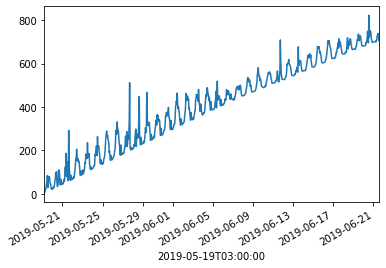

In [14]:
ts.plot()

In [56]:
ts.to_csv('../data/dataset/stl_example.csv')

/Users/gsinyakov/ts_course/.env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [54]:
res = detect_ts(ts, period=10)

In [53]:
plotting.plot_decomposition(res)

In [49]:
residuals = res[1] - res[2] - res[3]

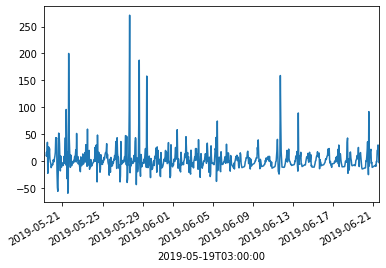

In [50]:
residuals.plot()

In [51]:
adfuller(residuals.dropna())

(-14.554061449751059,
 4.913661256419716e-27,
 3,
 697,
 {'1%': -3.439766853257416,
  '5%': -2.8656956054873377,
  '10%': -2.5689829557089308},
 6238.189735154259)

Задание:
    Ряд - stl_example.csv
    1. Апроксимировать ряд линейным трендом.
    2. Найти период сезонности.
    3. Получить сезонность при помощи медианного фильтра с периодом/2 найденным в п.2
    4. Вычесть тренд и сезонность, получить остатки.
    5. Проверить остатки на стационарность.
    6. Сделать порог на остатки. Получить аномалии.
   
detect_ts должна возвращать tuple из: (тренд, сезонность, остатки)